In [1]:
# To be able to make edits to repo without having to restart notebook
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, mannwhitneyu, wilcoxon, ttest_rel, ttest_ind
import seaborn as sns
import tkinter as tk
from tkinter import filedialog
import time
from pathlib import Path

PROJECT_PATH = os.getcwd()
sys.path.append(PROJECT_PATH)

In [32]:
data_dir = r'C:/Users/aaoun/OneDrive - cumc.columbia.edu/Desktop/HussainiLab/neuroscikit_test_data/GusData/GAR'
output_csv_names = ['morning_output.xlsx', 'afternoon_output.xlsx', 'rate_remapping.xlsx', 'centroid_remapping.xlsx']
output_folder = r'output'

def aggregate_prism_summary(data_dir, output_csv_names=['rate_remapping.xlsx'], output_folder='output'):

    animal_summaries = {}

    animal_folders = os.listdir(data_dir) 

    for i in range(len(animal_folders)):
        animal_id = animal_folders[i]
        animal_summaries[animal_id] = {}
        animal_summaries[animal_id]['summary'] = []
        animal_summaries[animal_id]['morning_summary'] = []
        animal_summaries[animal_id]['afternoon_summary'] = []
        animal_summaries[animal_id]['centroid_summary'] = []

        # animal_path = os.path.join(data_dir, animal_id)
        animal_path = data_dir + r'/' + animal_id
        # animal_path = animal_path.replace('//','\\')

        files = os.listdir(animal_path)

        # files = [files for _, _, files in  os.walk(animal_path)]
        # summary_files = np.array([[x for x in file_list if 'summary' in x][0] for file_list in files if len([x for x in file_list if 'summary' in x]) > 0]).flatten()
        ses_ct = 1
        for f in files:
            if r'.set' in f:
                f_split = f.split(r'.set')[0]

                if animal_id == r'1_20':
                    # print(animal_id, f_split)
                    f_split = f_split.replace(r'0531', r'00531')
                    f_split = f_split.replace(r'0601', r'00601')

                if f_split[-1] == r'3' or f_split[-1] == r'4':
                    
                    new_split = f_split[:-1]
                    new_split= new_split + str(int(f_split[-1]) - 2)
                    f_split = new_split

                prism_summary_file = r'neurofunc_PRISM_' + str(f_split) + r'/summary_' + str(f_split) + r'.xlsx'
                # prism_summary_fp = os.path.join(animal_path,prism_summary_file)
                prism_summary_fp = animal_path + r'/' + prism_summary_file
                # print(prism_summary_fp, os.path.exists(prism_summary_fp))

                if not os.path.exists(str(prism_summary_fp)):

                    prism_summary_file = r'neurofunc_PRISM_' + str(f_split) + r'/summary_PRISM_' + str(f_split) + r'.xlsx'
                    prism_summary_fp = animal_path + r'/' + prism_summary_file

                    if not os.path.exists(str(prism_summary_fp)):

                        prism_summary_file = r'neurofunc_PRISM_' + str(f_split) + r'/summary_sheet_' + str(f_split) + r'.xlsx'
                        prism_summary_fp = animal_path + r'/' + prism_summary_file
                        if not os.path.exists(str(prism_summary_fp)):

                            prism_summary_file = r'neurofunc_PRISM_' + str(f_split) + r'_temp/summary_' + str(f_split) + r'.xlsx'
                            prism_summary_fp = animal_path + r'/' + prism_summary_file

                            if not os.path.exists(str(prism_summary_fp)):
                                    
                                prism_summary_file = r'neurofunc_PRISM_' + str(f_split) + r'_temp/summary_sheet_' + str(f_split) + r'.xlsx'
                                prism_summary_fp = animal_path + r'/' + prism_summary_file

                                if not os.path.exists(str(prism_summary_fp)):
                                    prism_summary_file = r'neurofunc_PRISM_' + str(f_split) + r'_temp/summary_' + str(f_split) + r'_temp.xlsx'
                                    # prism_summary_fp = os.path.join(animal_path,prism_summary_file)
                                    prism_summary_fp = animal_path + r'/' + prism_summary_file

                df = pd.read_excel(str(prism_summary_fp))
                df.columns = df.columns.str.replace(' ', '')

                # remapping_outputs = {}
                for name in output_csv_names:
                    path = animal_path + r'/output/' + str(name)
                    var = pd.read_excel(path)
                    animal_summaries[animal_id][name.split('.xlsx')[0]] = var

                # ids = list(map(lambda x: np.any(np.all(x == animal_summaries[animal_id]['rate_remapping'][['tetrode','unit_id']].to_numpy(), axis=1)), df[['Tetrode', 'Cell']].to_numpy()))
                # take_rows = np.arange(len(df[['Tetrode', 'Cell']].to_numpy()))[ids]
                # print('pre df')
                # print(animal_summaries[animal_id]['rate_remapping'][['tetrode','unit_id']].to_numpy(), df[['Tetrode', 'Cell']].to_numpy())
                # print(df[['Tetrode', 'Cell']].to_numpy().shape, animal_summaries[animal_id]['rate_remapping'][['tetrode','unit_id']].to_numpy().shape)
                # print(df.shape)
                # df.drop(drop_rows)
                # print(ids, take_rows)
                # print(animal_summaries[animal_id]['rate_remapping'][['tetrode','unit_id']].to_numpy(), df[['Tetrode', 'Cell']].to_numpy())
                # df = df.iloc[take_rows]
                # print( df[['Tetrode', 'Cell']].to_numpy(), take_rows, animal_summaries[animal_id]['rate_remapping'][['tetrode','unit_id']])

                # print(ids, take_rows)
                # print('df')
                # print(df)
                # stop()
                # print(df.keys())
                # print(df['Tetrode'].to_numpy())

                ids = list(map(lambda x: np.any(np.all(x == animal_summaries[animal_id]['rate_remapping'][['tetrode','unit_id']].to_numpy(), axis=1)), df[['Tetrode', 'Cell']].to_numpy()))
                take_rows = np.arange(len(df[['Tetrode', 'Cell']].to_numpy()))[ids]
                df_rate = df.iloc[take_rows]
                animal_summaries[animal_id]['summary'].append(df_rate)

                ids = list(map(lambda x: np.any(np.all(x == animal_summaries[animal_id]['centroid_remapping'][['tetrode','unit_id']].to_numpy(), axis=1)), df[['Tetrode', 'Cell']].to_numpy()))
                take_rows = np.arange(len(df[['Tetrode', 'Cell']].to_numpy()))[ids]
                df_centroid = df.iloc[take_rows]
                animal_summaries[animal_id]['centroid_summary'].append(df_centroid)

                if ses_ct == 1 or ses_ct == 3:
                    ids = list(map(lambda x: np.any(np.all(x == animal_summaries[animal_id]['morning_output'][['tetrode','unit_id']].to_numpy(), axis=1)), df[['Tetrode', 'Cell']].to_numpy()))
                    take_rows = np.arange(len(df[['Tetrode', 'Cell']].to_numpy()))[ids]
                    df_morning = df.iloc[take_rows]
                    animal_summaries[animal_id]['morning_summary'].append(df_morning)

                if ses_ct == 2 or ses_ct == 4:
                    ids = list(map(lambda x: np.any(np.all(x == animal_summaries[animal_id]['afternoon_output'][['tetrode','unit_id']].to_numpy(), axis=1)), df[['Tetrode', 'Cell']].to_numpy()))
                    take_rows = np.arange(len(df[['Tetrode', 'Cell']].to_numpy()))[ids]
                    df_afternoon = df.iloc[take_rows]
                    animal_summaries[animal_id]['afternoon_summary'].append(df_afternoon)

                ses_ct += 1
        # stop()
        animal_summaries[animal_id]['summary'] = pd.concat(animal_summaries[animal_id]['summary'], axis=0).sort_values(['Tetrode', 'Cell'])
        animal_summaries[animal_id]['morning_summary'] = pd.concat(animal_summaries[animal_id]['morning_summary'], axis=0).sort_values(['Tetrode', 'Cell'])
        animal_summaries[animal_id]['afternoon_summary'] = pd.concat(animal_summaries[animal_id]['afternoon_summary'], axis=0).sort_values(['Tetrode', 'Cell'])
        animal_summaries[animal_id]['centroid_summary'] = pd.concat(animal_summaries[animal_id]['centroid_summary'], axis=0).sort_values(['Tetrode', 'Cell'])

    return animal_summaries

animal_summaries = aggregate_prism_summary(data_dir, output_csv_names, output_folder=output_folder)

In [4]:
# print(animal_summaries['1a23']['rate_remapping'][['tetrode','unit_id']])
# print(animal_summaries['1a23']['summary'][['Tetrode','Cell']])

# np.where(animal_summaries['1a23']['rate_remapping'][['tetrode','unit_id']].to_numpy() == animal_summaries['1a23']['summary'][['Tetrode','Cell']].to_numpy())

In [5]:
# ### EDIT FILE PATHS
# session_remapping = r'C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit\_prototypes\cell_remapping\output\rate_remapping.xlsx'
# fields_remapping = r'C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit\_prototypes\cell_remapping\output\centroid_remapping.xlsx'
# # context files below
# morning_remapping = r'C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit\_prototypes\cell_remapping\output\morning_output.xlsx'
# afternoon_remapping = r'C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit\_prototypes\cell_remapping\output\afternoon_output.xlsx'
# ### EDIT FILE PATHS

# session_data = pd.read_excel(session_remapping)
# fields_data = pd.read_excel(fields_remapping)
# morning_data = pd.read_excel(morning_remapping)
# afternoon_data = pd.read_excel(afternoon_remapping)

def extract_cell_type_dict(input_dict, cell_type_keys):

    to_process = cell_type_keys

    cell_type_dict = {}

    for i in range(len(to_process)):
        key = to_process[i]
        var = input_dict[key].to_numpy()
        cell_type_dict[key] = {}

        cell_type_dict[key]['start'] = []
        cell_type_dict[key]['end'] = []
        cell_type_dict[key]['diff'] = []

        for j in range(len(var)):
            var_element = var[j].replace('[','').replace(']','').split(', ')
            cell_type_dict[key]['start'].append(float(var_element[0]))
            cell_type_dict[key]['end'].append(float(var_element[1]))
            cell_type_dict[key]['diff'].append(float(var_element[2]))

    return cell_type_dict

def extract_cell_type(key, cell_type_dict):
    # start = cell_type_dict[key]['start']
    # end = cell_type_dict[key]['end']
    # diff = cell_type_dict[key]['diff']
    var = list(cell_type_dict[key].to_numpy())
    cell_id = list(cell_type_dict['Cell'].to_numpy())
    tetrode_id = list(cell_type_dict['Tetrode'].to_numpy())
    # print(var, list(cell_type_dict[key].keys()), cell_type_dict[key])
    # print(var, cell_id)
    prev_idx = None
    s = [] # start
    e = [] # end
    d = [] # diff
    # ses_ct = 0
    # print(len(var), len(cell_id))

    for i in range(len(cell_id)):
        # print(ses_ct)
        # print(cell_id)
        idx1 = cell_id[i]
        idx2 = tetrode_id[i]
        idx = [idx2, idx1]
        # print(ses_ct, s)
        if prev_idx is not None:
            if idx == prev_idx:
                # if ses_ct == 1:
                #     s.append(var[i-1])
                # if ses_ct <= 2 and i != len(cell_id) - 1 and cell_id[i+1] == idx:
                #     s.append(var[i])
                # if ses_ct >= 1:
                # print(idx, var[i-1], var[i])
                s.append(var[i-1])
                e.append(var[i])
                d.append(var[i] - var[i-1])
                
                # ses_ct += 1
            # else:
                # ses_ct = 0

                

        prev_idx = idx
        # ses_ct += 1
    # print(len(s), len(e), len(d))
    # print(cell_id)

    # start = np.array(var[:-1])
    # end = np.array(var[1:])
    # diff = start-end

    # print(len(cell_id), cell_id)
    # print(len(s))
    # stop()


    return s, e, d

# morning_cell_type_dict = extract_cell_type_dict(morning_data,cell_type_keys=cell_type_list)
# afternoon_cell_type_dict = extract_cell_type_dict(afternoon_data,cell_type_keys=cell_type_list)
# # fields_cell_type_dict = extract_cell_type_dict(fields_data,cell_type_keys=cell_type_list)
# session_cell_type_dict = extract_cell_type_dict(session_data,cell_type_keys=cell_type_list)
# fields_cell_type_dict = session_cell_type_dict

In [24]:
"""""""""""
Currently supports:

- session to session remapping: Use 'sliced_wass' as key into session_data for variable session_distances
- cumlative fileds remapping: Use 'cumulative_wass' as key into fields_data for variable session_distances 
- single context remapping: Use 'sliced_wass' as key into morning_data/afternoon_data for variable session_distances

- morning vs afternoon comparison:
    - First uncomment the two code blocks below that are preceded by "UNDO COMMENTS FOR CONTEXT COMPARISO"
    - Then go to the next cell and look for the code blocks with the comments:
        - COMMENT OUT IF/ELSE STATEMENT FOR CONTEXT COMPARISON, UNDO COMMENTS FOR FIELDS/SESSION
        - COMMENT OUT 2 LINES BELOW FOR FIELDS AND SESSION, UNDO COMMENTS FOR CONTEXT
    - Comment out the if/else statement and make sure the 2 lines are uncommented

Replace {file}_data variable below with relevant data [session_data, fields_data, morning_data, etc..]
Replace {file}_cell_type_dict variable below with relevant dict [session_cell_type_dict, fields_cell_type_dict, morning_cell_type_dict, etc..]
Proceed to next cell

Does not support:
- single field remapping (need to adjust for cases where field is missing from unit)
- morning vs afternoon comparisons

"""""""""""
cell_type_list = ['Information', 'Border_Score_Top', 'Border_Score_Bottom', 'Border_Score_Left', 'Border_Score_Right', 'Grid_Score']
app_ki = ['1_13', '1_14', '1a27', '1_30', '1_35']
control = ['1_20', '1_24', '1_25', '1_28', '1_34', '1a23']

def collect_emd_data(animal_summaries, animal_ids, cell_type_list, method='rate'):
    # methods = rate or centroid or context
    aggregate_session_distances = []
    aggregate_session_ids = np.array([[],[]]).T
    aggregate_cell_type_scores = [[[] for i in range(3)] for var in cell_type_list] 
    aggregate_cell_type_scores = np.array(aggregate_cell_type_scores).T
    for animal_id in app_ki:
        if method == 'rate':
            session_data = animal_summaries[animal_id]['rate_remapping']
            session_cell_type_dict = animal_summaries[animal_id]['summary'].to_dict('series')
            session_distances = np.array(session_data['sliced_wass'].to_numpy(), dtype=float)
            session_ids = np.array(np.vstack(session_data['session_ids'].apply(lambda x: (x.replace('[','').replace(']','').replace("'",'').split(', '))).to_numpy()))

        if method == 'context':
            afternoon_data = animal_summaries[animal_id]['afternoon_output']
            morning_data = animal_summaries[animal_id]['morning_output']
            morning_cell_type_dict = animal_summaries[animal_id]['morning_summary'].to_dict('series')
            afternoon_cell_type_dict = animal_summaries[animal_id]['afternoon_summary'].to_dict('series')
            session_distances = np.array(morning_data['sliced_wass'].to_numpy(), dtype=float)
            session_ids = np.array(np.vstack(morning_data['session_ids'].apply(lambda x: (x.replace('[','').replace(']','').replace("'",'').split(', '))).to_numpy()))
            session_distances2 = np.array(afternoon_data['sliced_wass'].to_numpy(), dtype=float)
            session_ids2 = np.array(np.vstack(afternoon_data['session_ids'].apply(lambda x: (x.replace('[','').replace(']','').replace("'",'').split(', '))).to_numpy()))
            session_distances = np.hstack((session_distances, session_distances2))
            session_ids = np.vstack((session_ids, session_ids2))

        if method == 'centroid':
            centroid_data = animal_summaries[animal_id]['centroid_remapping']
            centroid_cell_type_dict = animal_summaries[animal_id]['centroid_summary'].to_dict('series')
            session_distances = np.array(np.vstack(centroid_data['cumulative_wass'].apply(lambda x: (x.replace('[','').replace(']','').replace("'",'').split(', '))).to_numpy()),dtype=np.float32)[:,1]
            session_ids = np.array(np.vstack(centroid_data['session_ids'].apply(lambda x: (x.replace('[','').replace(']','').replace("'",'').split(', '))).to_numpy()))

        aggregate_session_distances = np.hstack((aggregate_session_distances, session_distances))
        aggregate_session_ids = np.vstack((aggregate_session_ids, session_ids))

        cell_type_scores = []
        s, e, d = [], [], []
        for var in cell_type_list:
            if method == 'rate' or method == 'centroid':
                start, end, diff = extract_cell_type(var, session_cell_type_dict) ### EDIT HERE ### to change dict type

            elif method == 'context':
                start, end, diff = extract_cell_type(var, morning_cell_type_dict) ### EDIT HERE ### to change dict type
                start2, end2, diff2 = extract_cell_type(var, afternoon_cell_type_dict) ### EDIT HERE ### to change dict type
                start = np.hstack((start, start2))
                end = np.hstack((end, end2))
                diff = np.hstack((diff, diff2))
            

            cell_type_scores.append(np.array([start,end,diff]))
        aggregate_cell_type_scores = np.vstack((np.array(aggregate_cell_type_scores), np.array(cell_type_scores).T))

    session_distances = aggregate_session_distances
    session_ids = aggregate_session_ids
    cell_type_scores = aggregate_cell_type_scores.T
    print(session_distances.shape, session_ids.shape, cell_type_scores.shape)
    return aggregate_session_distances, aggregate_session_ids, aggregate_cell_type_scores

session_distances, session_ids, cell_type_scores = collect_emd_data(animal_summaries, control, cell_type_list)


(237,) (237, 2) (6, 3, 237)


new
0.023159320621446107
0.011200221272600567
0.007883679708568016
new
0.5155053983035819
0.3816906559264869
0.309750411731507
new
0.023159320621446107
0.011200221272600567
0.007883679708568016
new
0.1073816022841064
0.09561571582186901
0.058827900571699815
new
0.5155053983035819
0.3816906559264869
0.309750411731507
new
0.1073816022841064
0.09561571582186901
0.058827900571699815


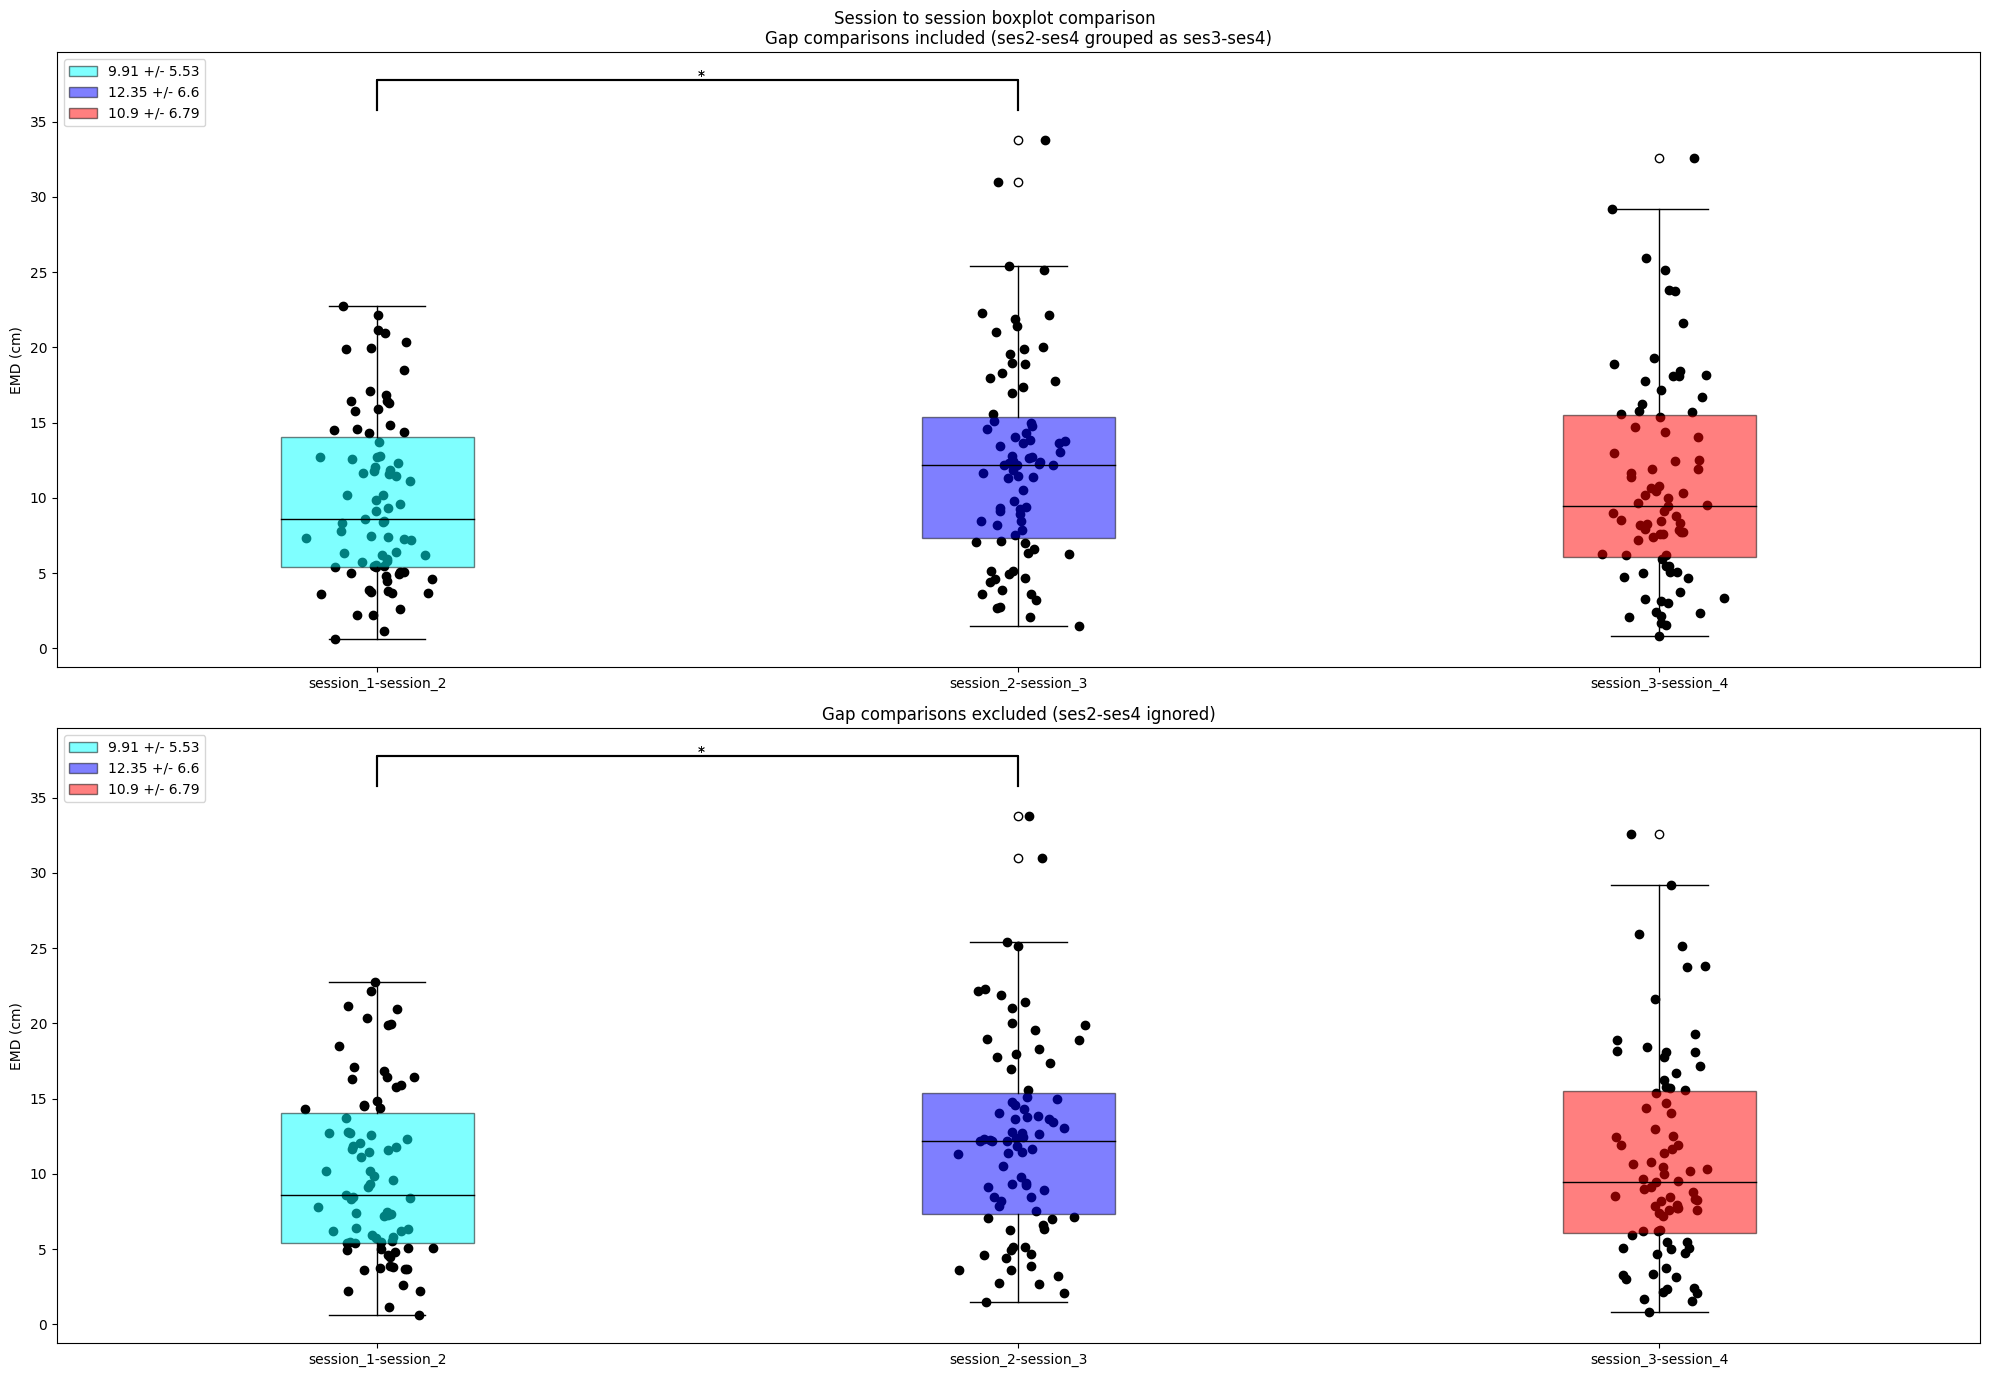

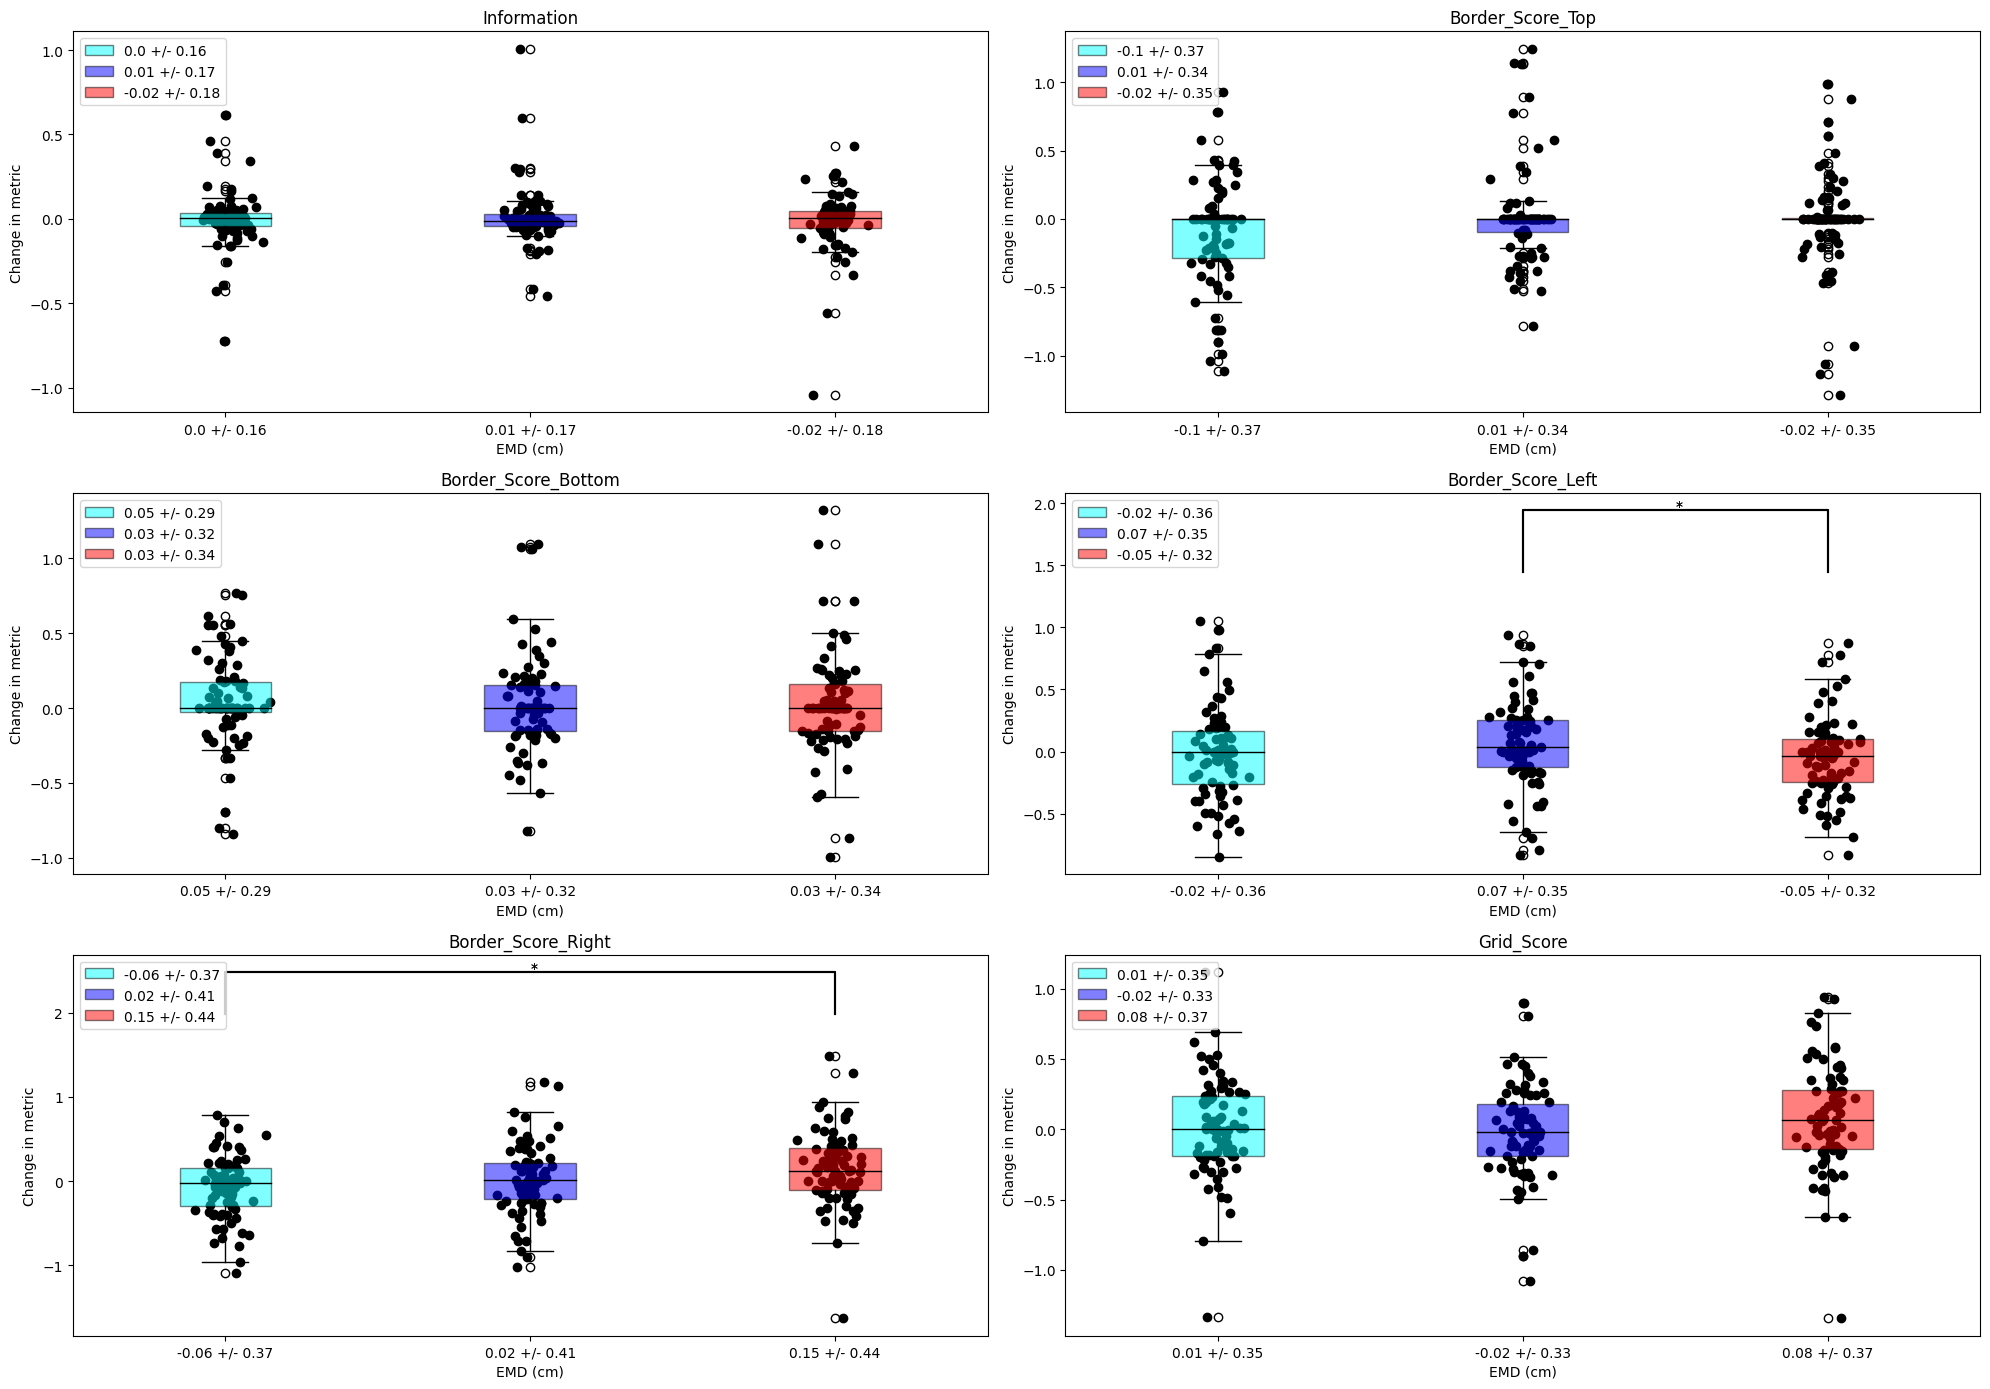

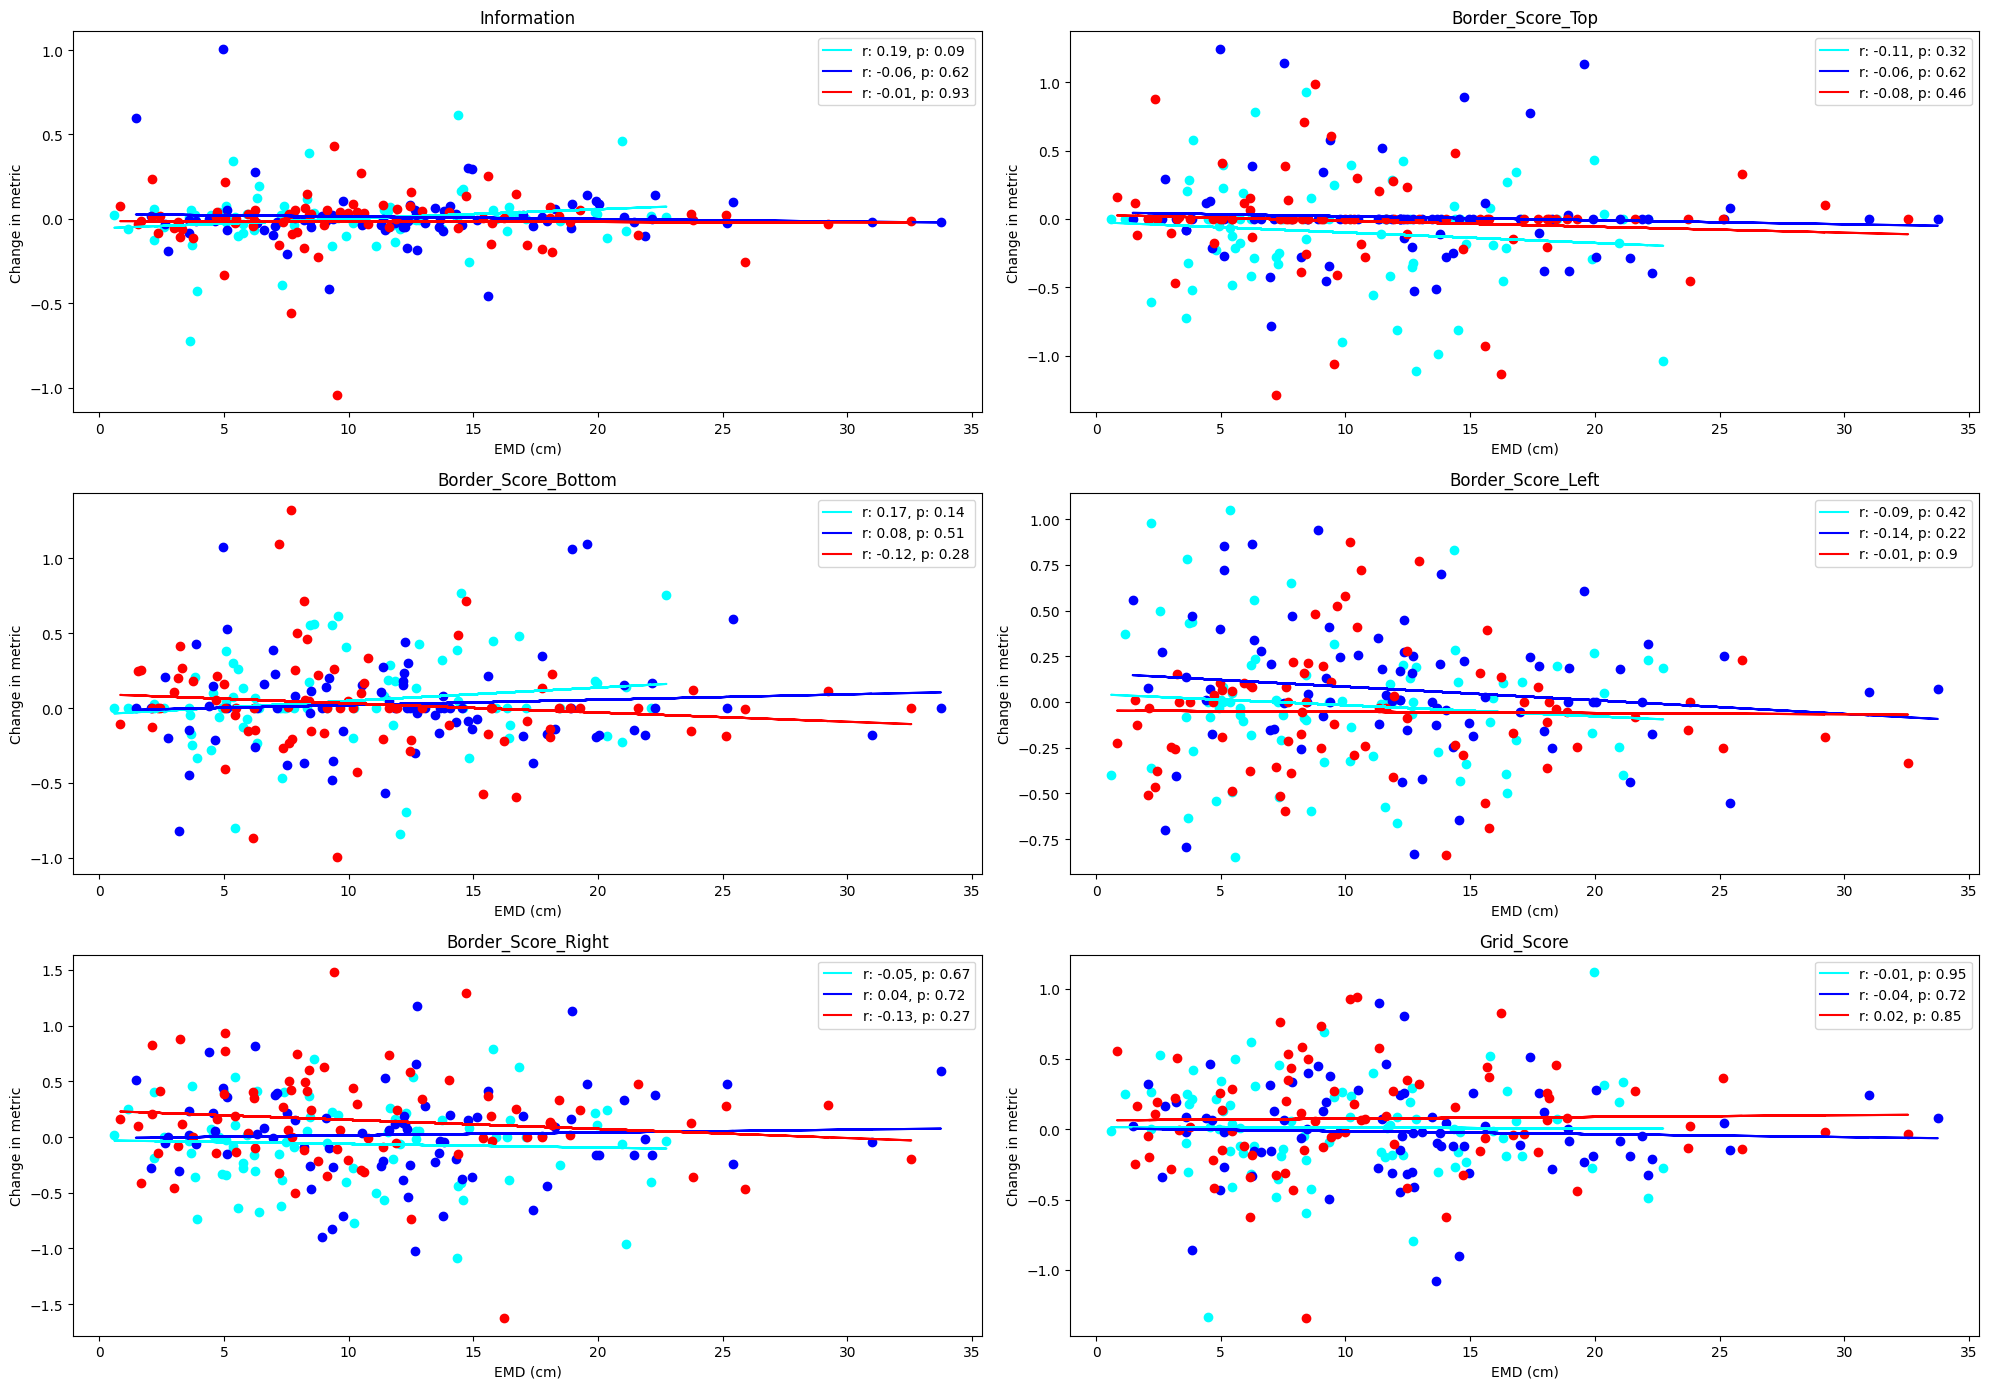

In [25]:
# Analyze session to session remapping
# Compare all session to session comparison groups, bar plot / histogram
# Correlate all comp groups to cell type scores in comp group - correlation plots + p value
# Average cell type score in session comp groups, bar plot / histogram
# Do t-tests on different comp to comp averages for remapping metric

def organize_by_session(session_distances, method='rate'):
    # method is rate or centroid or context
    assert len(session_ids) == len(session_distances)

    comparison_groups = np.unique(session_ids, axis=0)
    group_distances = {}
    group_ids = {}
    group_labels = []
    group_distances_exclude_missing = {}
    group_diffs = {}
    for comp_group in comparison_groups:
        ses1_id = int(comp_group[0].split('_')[-1])
        ses2_id = int(comp_group[1].split('_')[-1])

        # """ COMMENT OUT IF/ELSE STATEMENT FOR CONTEXT COMPARISON, UNDO COMMENTS FOR FIELDS/SESSION"""
        if method == 'rate' or method == 'centroid':
            if ses2_id - ses1_id > 1:
                label = comparison_groups[-1][0] + '-' + comparison_groups[-1][1]
                label_exlude = comp_group[0] + '-' + comp_group[1]
            else:
                label = comp_group[0] + '-' + comp_group[1]
                label_exclude = None
        # """ COMMENT OUT 2 LINES BELOW FOR FIELDS AND SESSION, UNDO COMMENTS FOR CONTEXT """
        elif method == 'context':
            label = comp_group[0] + '-' + comp_group[1]
            label_exclude = None

        # idx = np.where(session_ids == comp_group)[0]
        idx = list(map(lambda x: np.any(np.all(x == comp_group)), session_ids))
        # print(idx)
        distances = session_distances[idx]

        if label not in group_distances:
            group_distances[label] = distances
            group_ids[label] = idx
            group_labels.append(label)
        else:
            group_distances[label] = np.hstack((group_distances[label], distances))
            group_ids[label] = np.hstack((group_ids[label], idx))

        if label_exclude is None:
            group_distances_exclude_missing[label] = distances

            for k in range(len(cell_type_scores)):
                if cell_type_list[k] not in group_diffs:
                    group_diffs[cell_type_list[k]] = {}
                diff = cell_type_scores[k][2]
                diff = diff[idx]
                group_diffs[cell_type_list[k]][label] = diff

    return group_distances, group_distances_exclude_missing, group_diffs, group_labels, group_ids

group_distances, group_distances_exclude_missing, group_diffs, group_labels, group_ids = organize_by_session(session_distances, method='rate')

clrs = ['cyan','blue','r']
gds = list(group_distances.values())
gds_exclude = list(group_distances_exclude_missing.values())

# Correlate all comp groups to cell type scores in comp group - correlation plots + p value
fig = plt.figure(figsize=(20,14))
ax = plt.subplot(2,1,1)
bp = ax.boxplot(list(group_distances.values()), labels=group_labels, patch_artist=True, medianprops={'color': 'k'})

handles = []
labels = []
for i in range(len(group_labels)):
    jitter = np.random.normal(i+1,0.04, size=len(gds[i]))
    for j in range(len(group_labels)):
        if i != j:
            print('new')
            _, p = mannwhitneyu(gds[i], gds[j])
            print(p)
            _, p = wilcoxon(gds[i], gds[j], alternative='two-sided')
            print(p)
            _, p = ttest_rel(gds[i], gds[j])
            print(p)

            mxi = max(gds[i])
            mxj = max(gds[j])
            mx = max(mxi, mxj)

            h = 2
            # print(p)
            if p <= 0.025 or p >= 0.975:
                ax.text((i+1 + j+1)*.5,mx+h*2, "*")
                ax.plot([i+1,i+1, j+1, j+1], [mx+h, mx+h*2, mx+h*2,mx+h], color='k')

    ax.scatter(jitter, gds[i], color='k', alpha=1, zorder=1)
    handles.append(bp['boxes'][i])
    labels.append(str(round(np.mean(gds[i]),2)) + ' +/- ' + str(round(np.std(gds[i]),2)))
    bp['boxes'][i].set_facecolor(clrs[i])
    bp['boxes'][i].set_alpha(0.5)
ax.legend(handles, labels, loc='upper left')

ax.set_ylabel('EMD (cm)')
ax.set_title('Gap comparisons included (ses2-ses4 grouped as ses3-ses4)')

ax = plt.subplot(2,1,2)
bp = ax.boxplot(list(group_distances_exclude_missing.values()), labels=group_labels, patch_artist=True, medianprops={'color': 'k'})

handles = []
labels = []
for i in range(len(group_labels)):
    jitter = np.random.normal(i+1,0.04, size=len(gds_exclude[i]))
    for j in range(len(group_labels)):
        if i != j:
            _, p = mannwhitneyu(gds[i], gds[j])

            mxi = max(gds[i])
            mxj = max(gds[j])
            mx = max(mxi, mxj)

            h = 2

            if p <= 0.025 or p >= 0.975:
                ax.text((i+1 + j+1)*.5,mx+h*2, "*")
                ax.plot([i+1,i+1, j+1, j+1], [mx+h, mx+h*2, mx+h*2,mx+h], color='k')

    ax.scatter(jitter, gds_exclude[i], color='k', alpha=1, zorder=1)
    handles.append(bp['boxes'][i])
    bp['boxes'][i].set_facecolor(clrs[i])
    bp['boxes'][i].set_alpha(0.5)
    labels.append(str(round(np.mean(gds_exclude[i]),2)) + ' +/- ' + str(round(np.std(gds_exclude[i]),2)))
ax.legend(handles, labels, loc='upper left')

ax.set_ylabel('EMD (cm)')
ax.set_title('Gap comparisons excluded (ses2-ses4 ignored)')

fig.suptitle('Session to session boxplot comparison')

fig.tight_layout()
plt.show()

""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# Average cell type score in session comp groups, bar plot / histogram
fig = plt.figure(figsize=(20,14))

# information, grid score, etc...
for k in range(len(cell_type_list)):
    var = cell_type_list[k]
    ax = plt.subplot(3,2,k+1)
    clrs = ['cyan','blue','r']
    #ses1-2, ses2-3, etc...
    diffs = []
    diffs_labels = []
    for i in range(len(group_labels)):
        # group_data = gds_exclude[i]
        group_label = group_labels[i]
        diff = group_diffs[var][group_label]

        diffs.append(diff) 

        diffs_labels.append(str(round(np.mean(diff),2)) + ' +/- ' + str(round(np.std(diff),2)))


    bp = ax.boxplot(diffs, labels=diffs_labels, patch_artist=True, medianprops={'color': 'k'})
    handles = []
    for i in range(len(group_labels)):
        diff = diffs[i]
        jitter = np.random.normal(i+1,0.04, size=len(diff))
        for j in range(len(group_labels)):
            if i != j:
                _, p = mannwhitneyu(diffs[i], diffs[j])

                mxi = max(diffs[i])
                mxj = max(diffs[j])
                mx = max(mxi, mxj)

                h = 0.5

                if p <= 0.025 or p >= 0.975:
                    ax.text((i+1 + j+1)*.5,mx+h*2, "*")
                    ax.plot([i+1,i+1, j+1, j+1], [mx+h, mx+h*2, mx+h*2,mx+h], color='k')
        ax.scatter(jitter, diff, color='k', alpha=1, zorder=1)
        handles.append(bp['boxes'][i])
        bp['boxes'][i].set_facecolor(clrs[i])
        bp['boxes'][i].set_alpha(0.5)
    ax.legend(handles, diffs_labels, loc='upper left')

        

    ax.set_title(var)
    ax.set_ylabel('Change in metric')
    ax.set_xlabel('EMD (cm)')

fig.tight_layout()


""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# Correlate all comp groups to cell type scores in comp group - correlation plots + p value
fig = plt.figure(figsize=(20,14))

for k in range(len(cell_type_list)):
    var = cell_type_list[k]
    ax = plt.subplot(3,2,k+1)
    clrs = ['cyan','blue','r']
    for i in range(len(group_labels)):
        group_data = gds_exclude[i]
        group_label = group_labels[i]
        diff = group_diffs[var][group_label] 

        r, p = pearsonr(group_data, diff)

        # lbl = str(group_label) + ', 
        lbl = 'r: ' + str(round(r,2)) + ', p: ' + str(round(p,2))

        ax.scatter(group_data, diff,color=clrs[i])

        a, b = np.polyfit(group_data, diff,1)

        ax.plot(group_data, a*group_data+b, color=clrs[i], label=lbl)

    ax.set_title(var)
    ax.set_ylabel('Change in metric')
    ax.set_xlabel('EMD (cm)')
    ax.legend()

fig.tight_layout()


In [8]:
""" COMPARE TO OTHER GROUP """

cell_type_list = ['Information', 'Border_Score_Top', 'Border_Score_Bottom', 'Border_Score_Left', 'Border_Score_Right', 'Grid_Score']
aggregate_session_distances = []
aggregate_session_ids = np.array([[],[]]).T
aggregate_cell_type_scores = [[[] for i in range(3)] for var in cell_type_list] 
aggregate_cell_type_scores = np.array(aggregate_cell_type_scores).T

app_ki = ['1_13', '1_14', '1a27', '1_30', '1_35']
control = ['1_20', '1_24', '1_25', '1_28', '1_34', '1a23']

for animal_id in app_ki:
    # print(animal_id)
    # animal_id = animal_summaries[]
    session_data = animal_summaries[animal_id]['rate_remapping']
    session_cell_type_dict = animal_summaries[animal_id]['summary'].to_dict('series')
    afternoon_data = animal_summaries[animal_id]['afternoon_output']
    morning_data = animal_summaries[animal_id]['morning_output']
    morning_cell_type_dict = animal_summaries[animal_id]['morning_summary'].to_dict('series')
    afternoon_cell_type_dict = animal_summaries[animal_id]['afternoon_summary'].to_dict('series')
    centroid_data = animal_summaries[animal_id]['centroid_remapping']
    centroid_cell_type_dict = animal_summaries[animal_id]['centroid_summary'].to_dict('series')
    

    ### EDIT HERE ### to change data type
    session_distances = np.array(session_data['sliced_wass'].to_numpy(), dtype=float)
    session_ids = np.array(np.vstack(session_data['session_ids'].apply(lambda x: (x.replace('[','').replace(']','').replace("'",'').split(', '))).to_numpy()))
    # session_distances = np.array(np.vstack(centroid_data['cumulative_wass'].apply(lambda x: (x.replace('[','').replace(']','').replace("'",'').split(', '))).to_numpy()),dtype=np.float32)[:,1]
    # session_ids = np.array(np.vstack(centroid_data['session_ids'].apply(lambda x: (x.replace('[','').replace(']','').replace("'",'').split(', '))).to_numpy()))


    """ UNDO COMMENTS FOR CONTEXT COMPARISON """
    # session_distances = np.array(morning_data['sliced_wass'].to_numpy(), dtype=float)
    # session_ids = np.array(np.vstack(morning_data['session_ids'].apply(lambda x: (x.replace('[','').replace(']','').replace("'",'').split(', '))).to_numpy()))
    # session_distances2 = np.array(afternoon_data['sliced_wass'].to_numpy(), dtype=float)
    # session_ids2 = np.array(np.vstack(afternoon_data['session_ids'].apply(lambda x: (x.replace('[','').replace(']','').replace("'",'').split(', '))).to_numpy()))
    # session_distances = np.hstack((session_distances, session_distances2))
    # session_ids = np.vstack((session_ids, session_ids2))

    aggregate_session_distances = np.hstack((aggregate_session_distances, session_distances))
    aggregate_session_ids = np.vstack((aggregate_session_ids, session_ids))

    cell_type_scores = []
    s, e, d = [], [], []
    for var in cell_type_list:
        start, end, diff = extract_cell_type(var, session_cell_type_dict) ### EDIT HERE ### to change dict type
        # print(np.array([start,end,diff]).shape)
        """ UNDO COMMENTS FOR CONTEXT COMPARISON """
        # start, end, diff = extract_cell_type(var, morning_cell_type_dict) ### EDIT HERE ### to change dict type
        # start2, end2, diff2 = extract_cell_type(var, afternoon_cell_type_dict) ### EDIT HERE ### to change dict type
        # start = np.hstack((start, start2))
        # end = np.hstack((end, end2))
        # diff = np.hstack((diff, diff2))
        

        cell_type_scores.append(np.array([start,end,diff]))
    # print(len(cell_type_scores[4]))
    # print(np.array(aggregate_cell_type_scores).shape, np.array(cell_type_scores).shape)
    # print(np.array(aggregate_cell_type_scores).shape, np.array(cell_type_scores).shape)
    # print(session_distances.shape, session_ids.shape, np.array(cell_type_scores).shape)
    aggregate_cell_type_scores = np.vstack((np.array(aggregate_cell_type_scores), np.array(cell_type_scores).T))

session_distances2 = aggregate_session_distances
session_ids2 = aggregate_session_ids
cell_type_scores2 = aggregate_cell_type_scores.T
print(session_distances2.shape, session_ids2.shape, cell_type_scores2.shape)


(237,) (237, 2) (6, 3, 237)


new
0.5035430525623739
0.7339042257372956
new
0.5035430525623739
0.7339042257372956
0.5035430525623739 0.7339042257372956
0.5035430525623739 0.7339042257372956


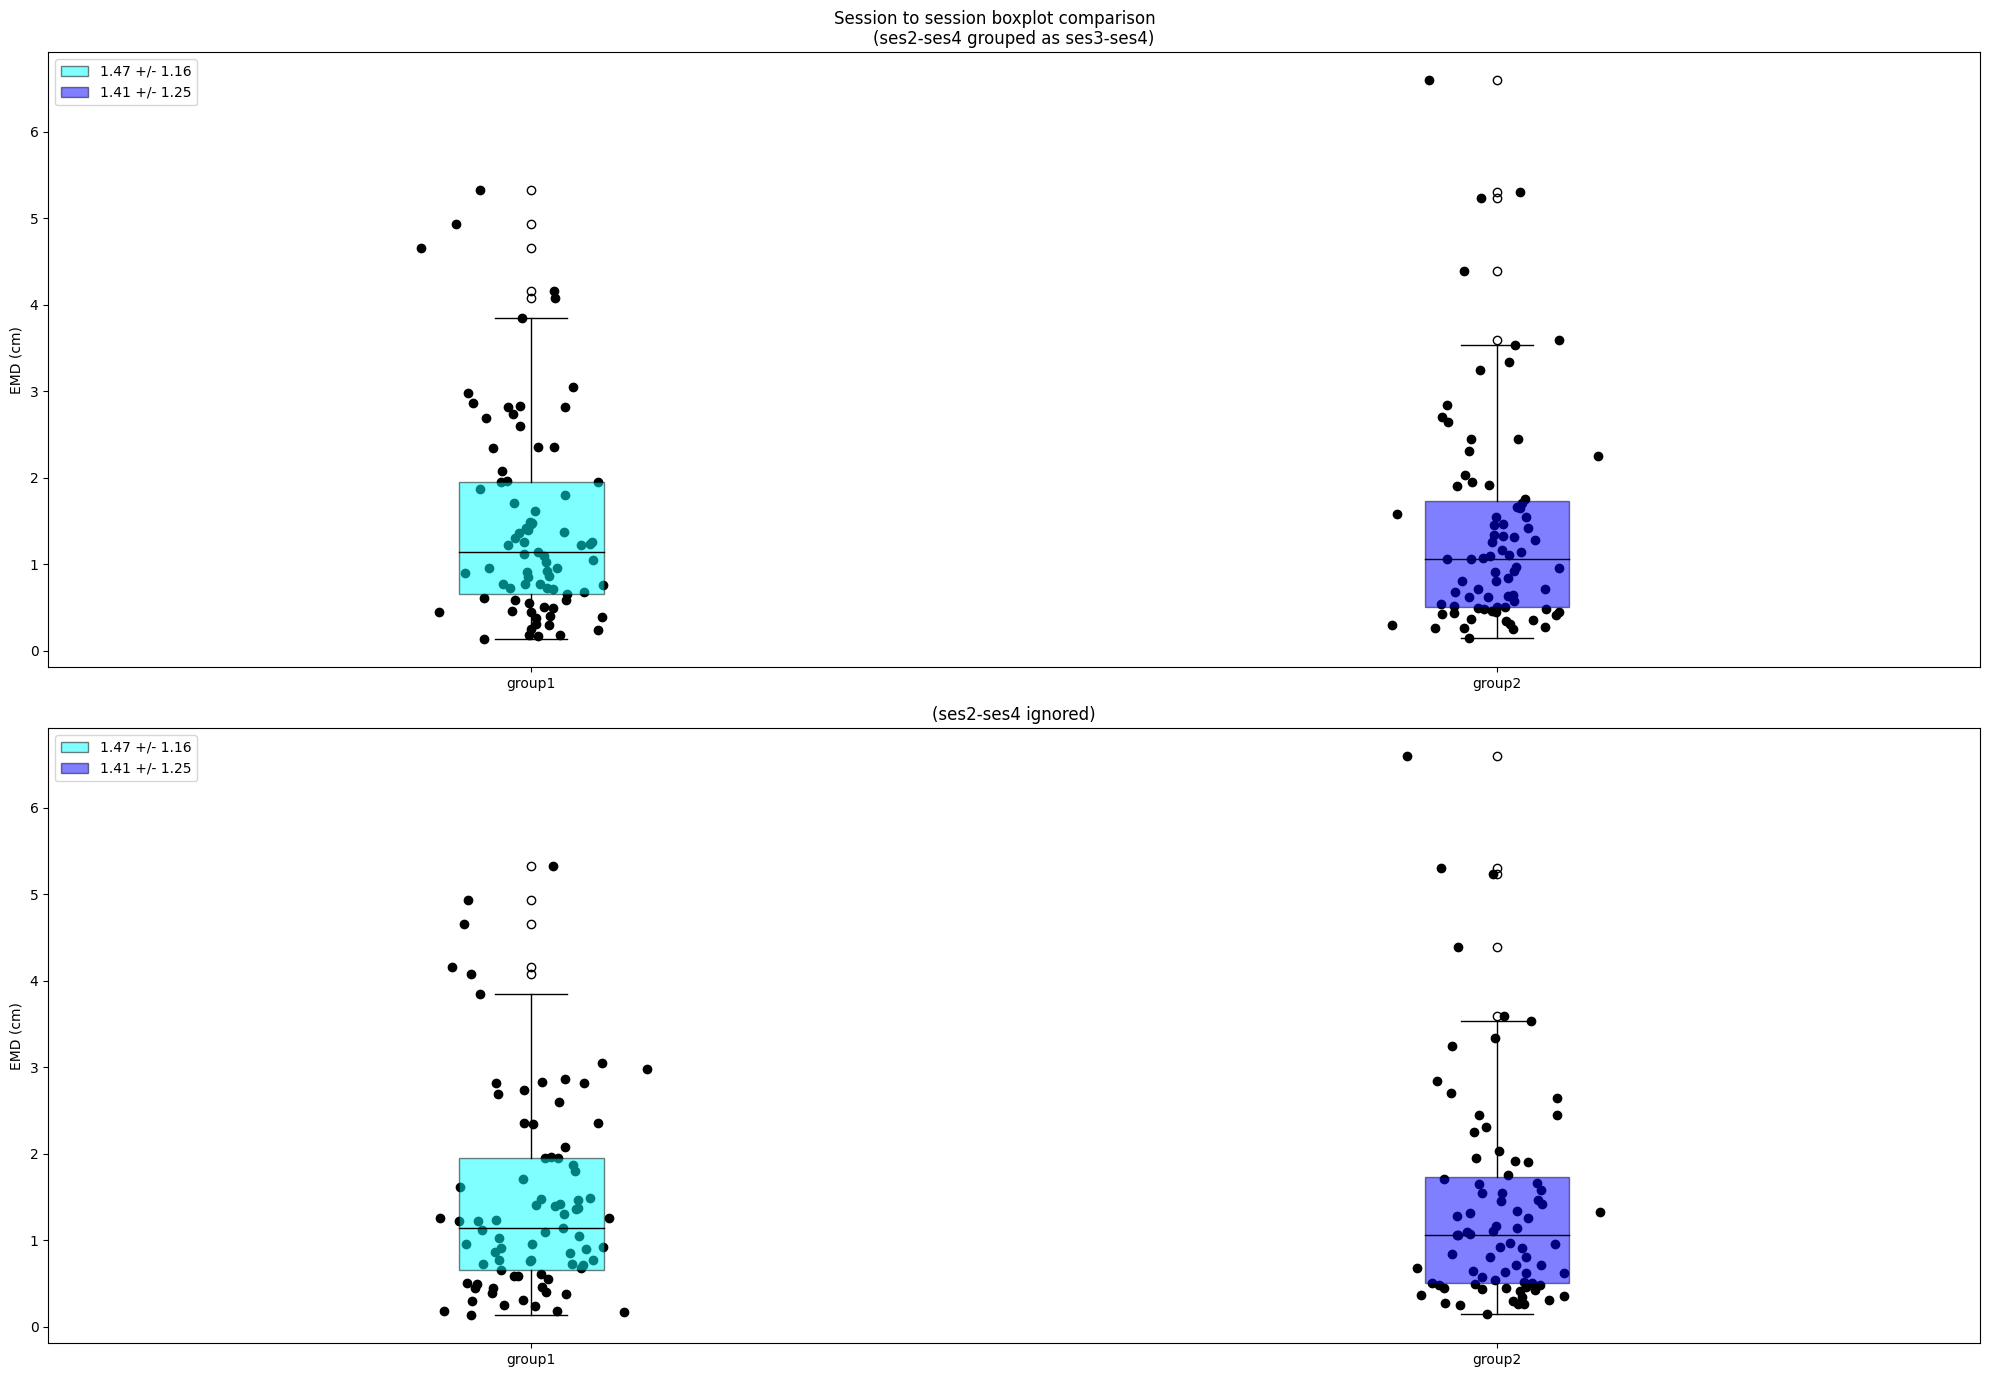

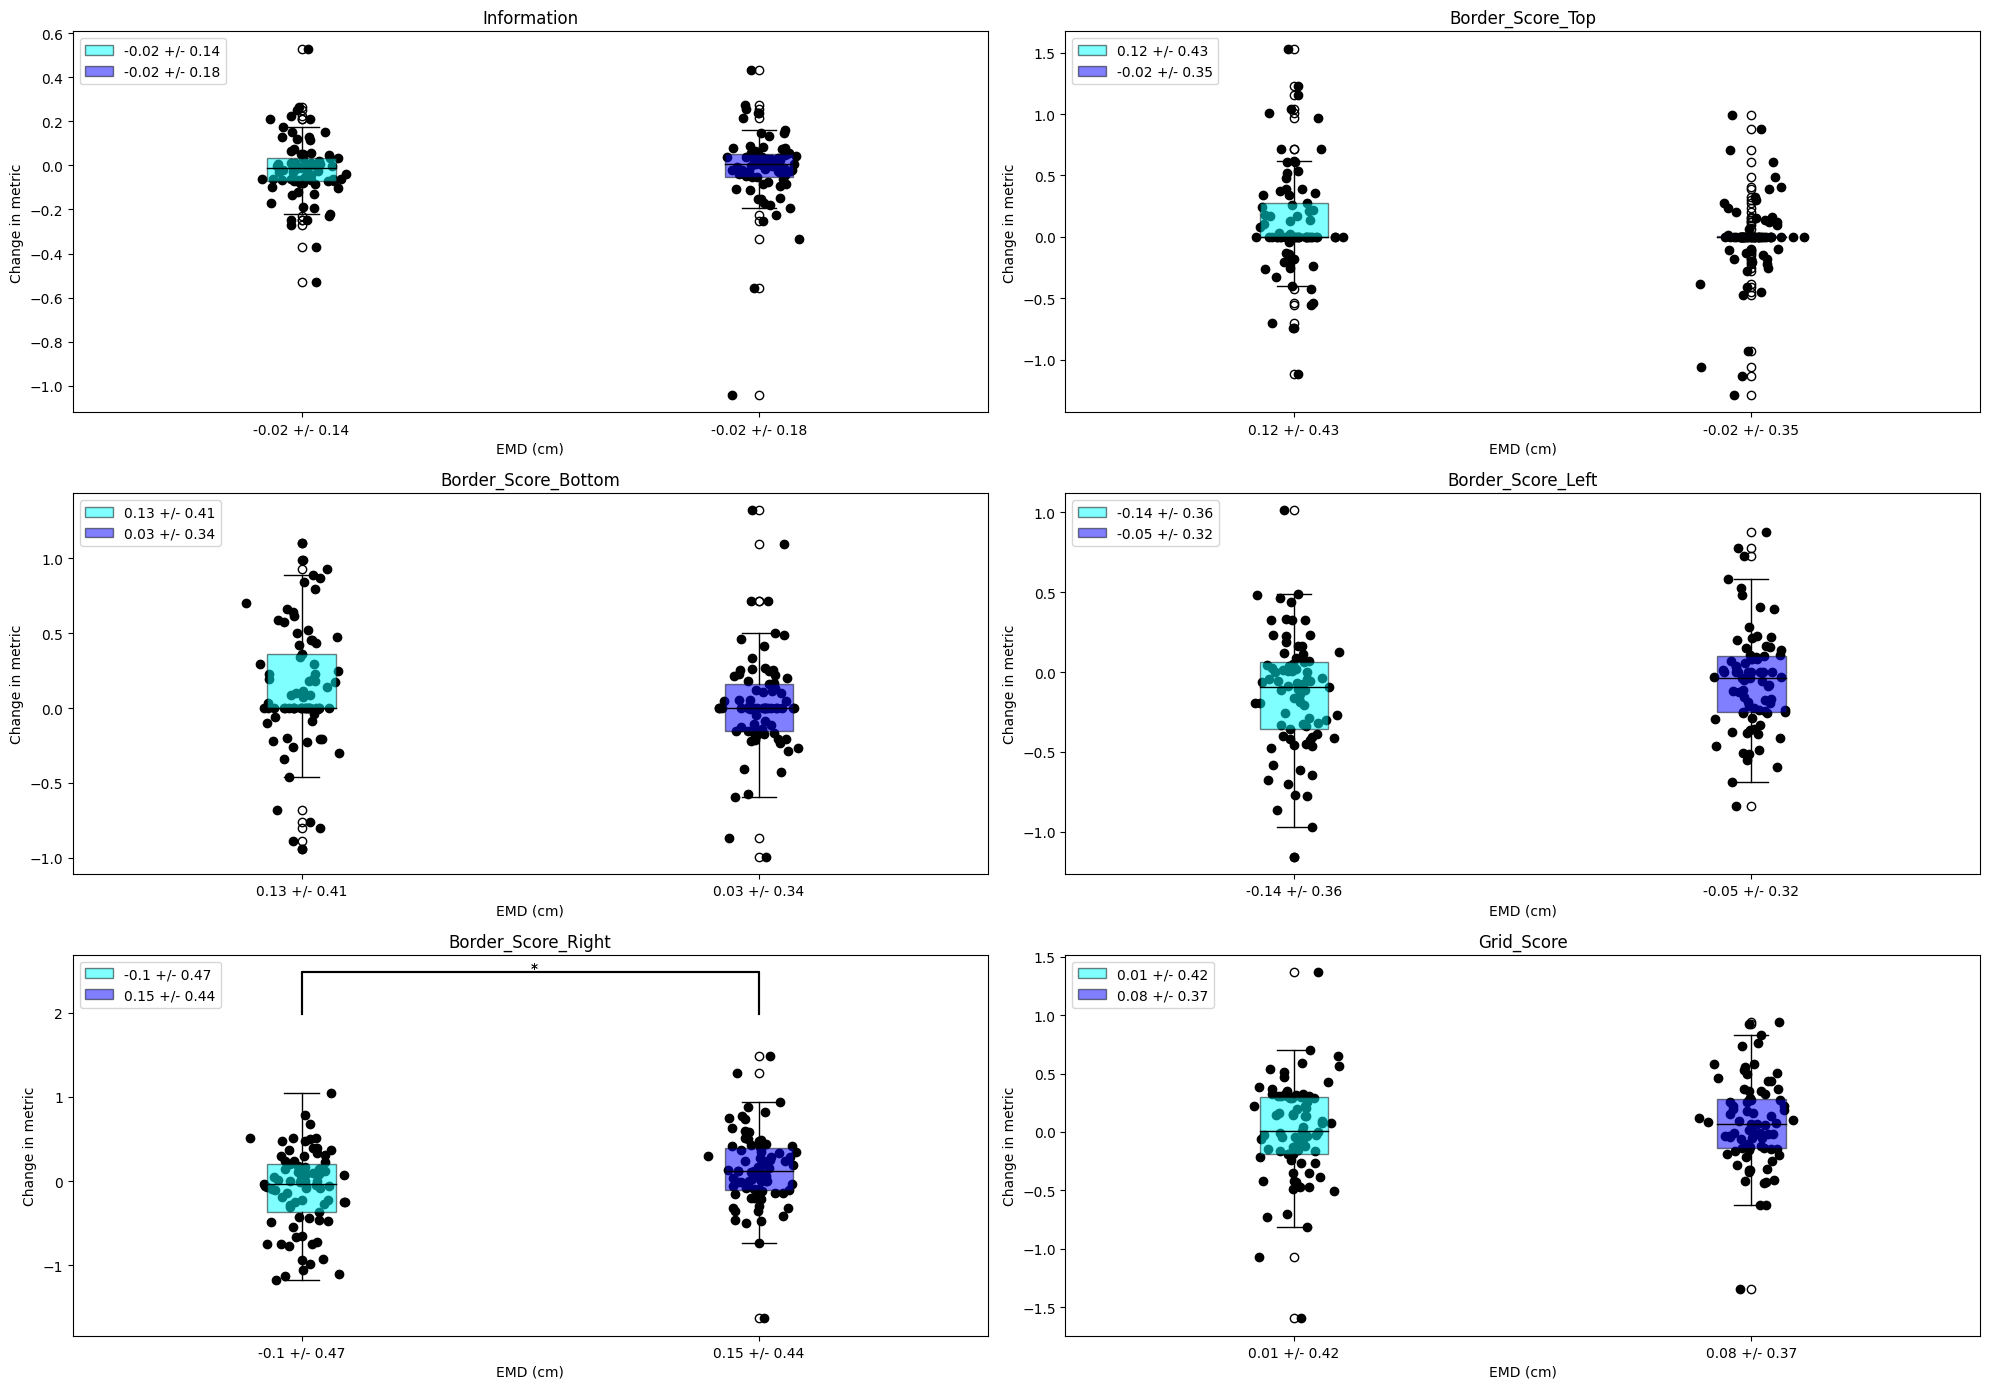

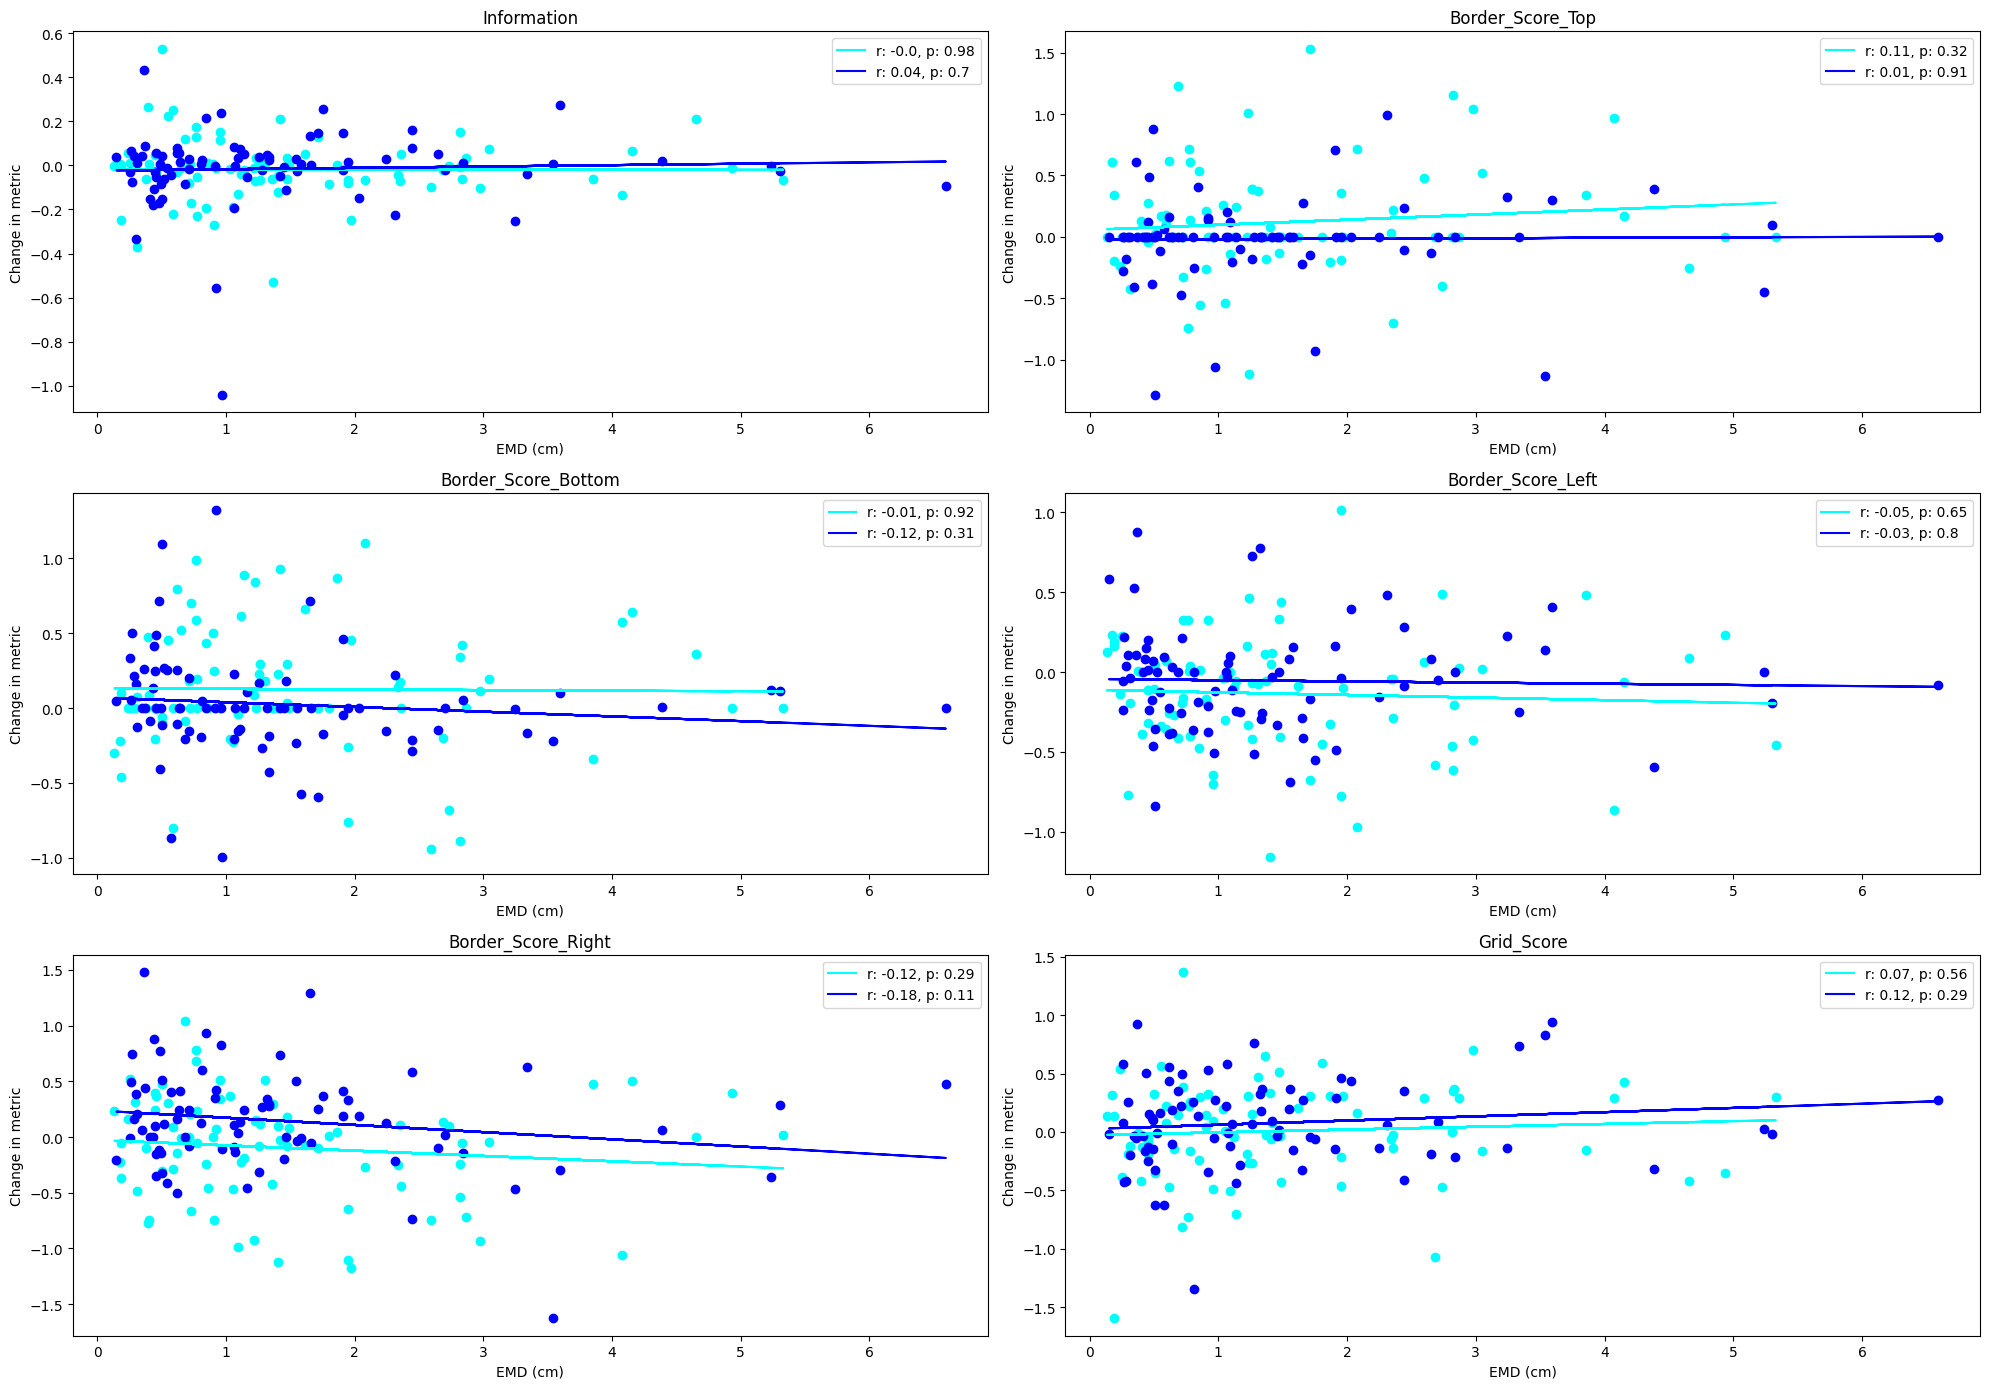

In [9]:
# Analyze session to session remapping
# Compare all session to session comparison groups, bar plot / histogram
# Correlate all comp groups to cell type scores in comp group - correlation plots + p value
# Average cell type score in session comp groups, bar plot / histogram
# Do t-tests on different comp to comp averages for remapping metric

assert len(session_ids2) == len(session_distances2)

comparison_groups2 = np.unique(session_ids2, axis=0)
group_distances2 = {}
group_ids2 = {}
group_labels2 = []
group_distances_exclude_missing2 = {}
group_diffs2 = {}
for comp_group in comparison_groups2:
    ses1_id = int(comp_group[0].split('_')[-1])
    ses2_id = int(comp_group[1].split('_')[-1])

    """ COMMENT OUT IF/ELSE STATEMENT FOR CONTEXT COMPARISON, UNDO COMMENTS FOR FIELDS/SESSION"""
    if ses2_id - ses1_id > 1:
        label = comparison_groups2[-1][0] + '-' + comparison_groups2[-1][1]
        label_exlude = comp_group[0] + '-' + comp_group[1]
    else:
        label = comp_group[0] + '-' + comp_group[1]
        label_exclude = None
    """ COMMENT OUT 2 LINES BELOW FOR FIELDS AND SESSION, UNDO COMMENTS FOR CONTEXT """
    # label = comp_group[0] + '-' + comp_group[1]
    # label_exclude = None

    # idx = np.where(session_ids == comp_group)[0]
    idx = list(map(lambda x: np.any(np.all(x == comp_group)), session_ids2))
    # print(idx)
    distances = session_distances2[idx]

    if label not in group_distances2:
        group_distances2[label] = distances
        group_ids2[label] = idx
        group_labels2.append(label)
    else:
        group_distances2[label] = np.hstack((group_distances2[label], distances))
        group_ids2[label] = np.hstack((group_ids2[label], idx))

    if label_exclude is None:
        group_distances_exclude_missing2[label] = distances

        for k in range(len(cell_type_scores2)):
            if cell_type_list[k] not in group_diffs2:
                group_diffs2[cell_type_list[k]] = {}
            diff = cell_type_scores2[k][2]
            diff = diff[idx]
            group_diffs2[cell_type_list[k]][label] = diff

# stop()

comp_group_to_use = 'session_3-session_4' # ses3/4
new_gds = {}
new_gds['group1'] = group_distances[comp_group_to_use]
new_gds['group2'] = group_distances2[comp_group_to_use]
new_gds_exclude = {}
new_gds_exclude['group1'] = group_distances_exclude_missing[comp_group_to_use]
new_gds_exclude['group2'] = group_distances_exclude_missing2[comp_group_to_use]
new_group_diffs = {}
for k in range(len(cell_type_list)):
    new_group_diffs[cell_type_list[k]] = {}
    new_group_diffs[cell_type_list[k]]['group1'] = group_diffs[cell_type_list[k]][comp_group_to_use]
    new_group_diffs[cell_type_list[k]]['group2'] = group_diffs2[cell_type_list[k]][comp_group_to_use]

group_diffs = new_group_diffs
gds = list(new_gds.values())
gds_exclude = list(new_gds_exclude.values())
clrs = ['cyan','blue','r']
group_labels = ['group1', 'group2']
group_distances = {'group1': group_distances[comp_group_to_use], 'group2': group_distances2[comp_group_to_use]}
group_distances_exclude_missing = {'group1': group_distances_exclude_missing[comp_group_to_use], 'group2': group_distances_exclude_missing2[comp_group_to_use]}


# Correlate all comp groups to cell type scores in comp group - correlation plots + p value
fig = plt.figure(figsize=(20,14))
ax = plt.subplot(2,1,1)
bp = ax.boxplot(list(group_distances.values()), labels=group_labels, patch_artist=True, medianprops={'color': 'k'})

handles = []
labels = []
for i in range(len(group_labels)):
    jitter = np.random.normal(i+1,0.04, size=len(gds[i]))
    for j in range(len(group_labels)):
        if i != j:
            print('new')
            _, p = mannwhitneyu(gds[i], gds[j])
            print(p)
            # _, p = wilcoxon(gds[i], gds[j], alternative='two-sided')
            # print(p)
            _, p_t = ttest_ind(gds[i], gds[j])
            print(p_t)

            mxi = max(gds[i])
            mxj = max(gds[j])
            mx = max(mxi, mxj)

            h = 2
            # print(p)
            if p <= 0.025 or p >= 0.975:
                ax.text((i+1 + j+1)*.5,mx+h*2, "*")
                ax.plot([i+1,i+1, j+1, j+1], [mx+h, mx+h*2, mx+h*2,mx+h], color='k')

    ax.scatter(jitter, gds[i], color='k', alpha=1, zorder=1)
    handles.append(bp['boxes'][i])
    labels.append(str(round(np.mean(gds[i]),2)) + ' +/- ' + str(round(np.std(gds[i]),2)))
    bp['boxes'][i].set_facecolor(clrs[i])
    bp['boxes'][i].set_alpha(0.5)
ax.legend(handles, labels, loc='upper left')

ax.set_ylabel('EMD (cm)')
ax.set_title('(ses2-ses4 grouped as ses3-ses4)')

ax = plt.subplot(2,1,2)
bp = ax.boxplot(list(group_distances_exclude_missing.values()), labels=group_labels, patch_artist=True, medianprops={'color': 'k'})

handles = []
labels = []
for i in range(len(group_labels)):
    jitter = np.random.normal(i+1,0.04, size=len(gds_exclude[i]))
    for j in range(len(group_labels)):
        if i != j:
            _, p = mannwhitneyu(gds[i], gds[j])
            _, p_t = ttest_ind(gds[i], gds[j])
            print(p, p_t)

            mxi = max(gds[i])
            mxj = max(gds[j])
            mx = max(mxi, mxj)

            h = 2

            if p <= 0.025 or p >= 0.975:
                ax.text((i+1 + j+1)*.5,mx+h*2, "*")
                ax.plot([i+1,i+1, j+1, j+1], [mx+h, mx+h*2, mx+h*2,mx+h], color='k')

    ax.scatter(jitter, gds_exclude[i], color='k', alpha=1, zorder=1)
    handles.append(bp['boxes'][i])
    bp['boxes'][i].set_facecolor(clrs[i])
    bp['boxes'][i].set_alpha(0.5)
    labels.append(str(round(np.mean(gds_exclude[i]),2)) + ' +/- ' + str(round(np.std(gds_exclude[i]),2)))
ax.legend(handles, labels, loc='upper left')

ax.set_ylabel('EMD (cm)')
ax.set_title('(ses2-ses4 ignored)')

fig.suptitle('Session to session boxplot comparison')

fig.tight_layout()
plt.show()

""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# Average cell type score in session comp groups, bar plot / histogram
fig = plt.figure(figsize=(20,14))

# information, grid score, etc...
for k in range(len(cell_type_list)):
    var = cell_type_list[k]
    ax = plt.subplot(3,2,k+1)
    clrs = ['cyan','blue','r']
    #ses1-2, ses2-3, etc...
    diffs = []
    diffs_labels = []
    for i in range(len(group_labels)):
        # group_data = gds_exclude[i]
        group_label = group_labels[i]
        diff = group_diffs[var][group_label]

        diffs.append(diff) 

        diffs_labels.append(str(round(np.mean(diff),2)) + ' +/- ' + str(round(np.std(diff),2)))


    bp = ax.boxplot(diffs, labels=diffs_labels, patch_artist=True, medianprops={'color': 'k'})
    handles = []
    for i in range(len(group_labels)):
        diff = diffs[i]
        jitter = np.random.normal(i+1,0.04, size=len(diff))
        for j in range(len(group_labels)):
            if i != j:
                _, p = mannwhitneyu(diffs[i], diffs[j])

                mxi = max(diffs[i])
                mxj = max(diffs[j])
                mx = max(mxi, mxj)

                h = 0.5

                if p <= 0.025 or p >= 0.975:
                    ax.text((i+1 + j+1)*.5,mx+h*2, "*")
                    ax.plot([i+1,i+1, j+1, j+1], [mx+h, mx+h*2, mx+h*2,mx+h], color='k')
        ax.scatter(jitter, diff, color='k', alpha=1, zorder=1)
        handles.append(bp['boxes'][i])
        bp['boxes'][i].set_facecolor(clrs[i])
        bp['boxes'][i].set_alpha(0.5)
    ax.legend(handles, diffs_labels, loc='upper left')

        

    ax.set_title(var)
    ax.set_ylabel('Change in metric')
    ax.set_xlabel('EMD (cm)')

fig.tight_layout()


""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# Correlate all comp groups to cell type scores in comp group - correlation plots + p value
fig = plt.figure(figsize=(20,14))

for k in range(len(cell_type_list)):
    var = cell_type_list[k]
    ax = plt.subplot(3,2,k+1)
    clrs = ['cyan','blue','r']
    for i in range(len(group_labels)):
        group_data = gds_exclude[i]
        group_label = group_labels[i]
        diff = group_diffs[var][group_label] 

        r, p = pearsonr(group_data, diff)

        # lbl = str(group_label) + ', 
        lbl = 'r: ' + str(round(r,2)) + ', p: ' + str(round(p,2))

        ax.scatter(group_data, diff,color=clrs[i])

        a, b = np.polyfit(group_data, diff,1)

        ax.plot(group_data, a*group_data+b, color=clrs[i], label=lbl)

    ax.set_title(var)
    ax.set_ylabel('Change in metric')
    ax.set_xlabel('EMD (cm)')
    ax.legend()

fig.tight_layout()


In [10]:
group_diffs['Information'].keys()

dict_keys(['group1', 'group2'])

In [11]:
np.array(gds).shape

C:\Users\aaoun\AppData\Local\Temp\ipykernel_14440\3476655027.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(gds).shape


(2,)

In [12]:
len(gds[1])

79

In [13]:
group_labels

['group1', 'group2']